<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/ThermoPropertyCharts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Thermodynamic property charts
#@markdown Demonstration of thermodynamic property charts using neqsim and CoolProp
%%capture
!pip install neqsim
!pip install CoolProp
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('classic')
%matplotlib inline

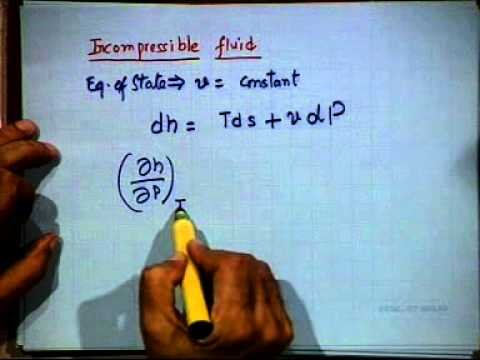

In [2]:
#@title Thermodynamic property charts
#@markdown This video gives an intriduction to creating thermodynamic property charts
from IPython.display import YouTubeVideo
YouTubeVideo('kLA9AGv8AB4', width=600, height=400)

# The pH diagram

On the P-H diagram, pressure is indicated on the y-axis and enthalpy is indicated on the x-axis. Typically enthalpy is in units of Btu/lb and pressure is in units of pounds per square inch (psi). The upside down U figure shown on the diagram designates the points at which the refrigerant changes phase. The left vertical curve indicates the saturated liquid curve and the right vertical curve indicates the saturated vapor curve. The region in between the two curves describe refrigerant states that contain a mixture of both liquid and vapor. The locations to the left of the saturated liquid curve indicate that the refrigerant is in liquid form and locations to the right of the saturated vapor curve indicate that the refrigerant is in vapor form. The point at which the two curves meet is called the critical point. The importance of this point is that at any point above, no additional pressure will change the vapor into a liquid.

/usr/local/lib/python3.6/dist-packages/CoolProp/Plots/Common.py:610: UserWarning: Please use "calc_sat_range" to calculate saturation and isoquality lines. Input ranges are discarded.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/CoolProp/Plots/Common.py:610: UserWarning: Please use "calc_sat_range" to calculate saturation and isoquality lines. Input ranges are discarded.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/CoolProp/Plots/Common.py:657: UserWarning: An error occurred for inputs 8919111.614016, 2423.071691 with index (248,): unable to solve 1phase PY flash with Tmin=169.849, Tmax=682.5 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [247.231 J/mol/K] is above the maximum value of 247.211048112 J/mol/K
  UserWarning)
/usr/local/lib/python3.6/dist-packages/CoolProp/Plots/Common.py:657: UserWarning: An error occurred for inputs 9133000.049092, 2423.071691 with index (249,): unable to solve 1phase PY flash with Tmin=169.849, Tma

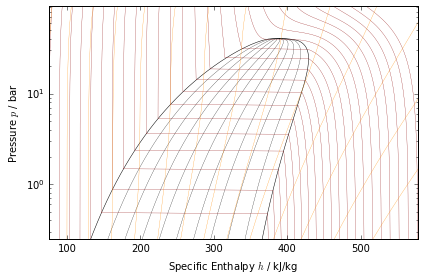

In [3]:
#@title Create a pH diagram { run: "auto" }

import CoolProp
from CoolProp.Plots import PropertyPlot

componentName = "R134a" #@param ["R134a", "ethane", "propane", "CO2", "nitrogen"]


plot = PropertyPlot(componentName, 'PH', unit_system='EUR', tp_limits='ACHP')
plot.calc_isolines(CoolProp.iQ, num=11)
plot.calc_isolines(CoolProp.iT, num=25)
plot.calc_isolines(CoolProp.iSmass, num=15)
plot.show()

# The Ts diagram
A Temperature-entropy diagram (T-s diagram) is the type of diagram most frequently used to analyze energy transfer system cycles. It is used in thermodynamics to visualize changes to temperature and specific entropy during a thermodynamic process or cycle.

/usr/local/lib/python3.6/dist-packages/CoolProp/Plots/Common.py:610: UserWarning: Please use "calc_sat_range" to calculate saturation and isoquality lines. Input ranges are discarded.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/CoolProp/Plots/Common.py:657: UserWarning: An error occurred for inputs 100000.000000, -0.851257 with index (0,): unable to solve 1phase PY flash with Tmin=273.152, Tmax=372.757 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [-0.0153356 J/mol/K] is below the minimum value of -0.00221131669604 J/mol/K
  UserWarning)
/usr/local/lib/python3.6/dist-packages/CoolProp/Plots/Common.py:657: UserWarning: An error occurred for inputs 150000.000000, -0.851257 with index (0,): unable to solve 1phase PY flash with Tmin=273.148, Tmax=384.501 due to error: HSU_P_flash_singlephase_Brent could not find a solution because Smolar [-0.0153356 J/mol/K] is below the minimum value of -0.00318420231756 J/mol/K
  UserWarning)
/usr/local/li

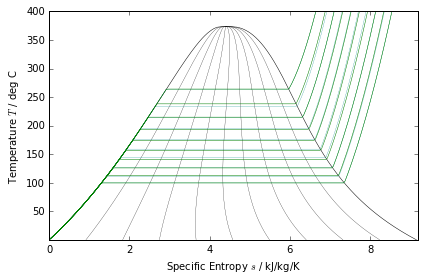

In [4]:
#@title Create a Ts diagram { run: "auto" }
componentName = "water" #@param ["water", "HEOS::R245fa", "R134a", "ethane", "propane", "CO2", "nitrogen"]
import CoolProp
from CoolProp.Plots import PropertyPlot
plot = PropertyPlot(componentName, 'TS', unit_system='EUR', tp_limits='ORC')
plot.calc_isolines(CoolProp.iQ, num=11)
plot.calc_isolines(CoolProp.iP, iso_range=[1,50], num=10, rounding=True)
plot.draw()
plot.isolines.clear()
plot.props[CoolProp.iP]['color'] = 'green'
plot.props[CoolProp.iP]['lw'] = '0.5'
plot.calc_isolines(CoolProp.iP, iso_range=[1,50], num=10, rounding=False)
plot.show()

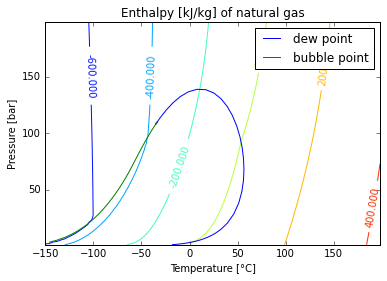

In [5]:
#@title Enthalpy chart of natural gas
minPressure = 1.0  #@param {type:"number"}
maxPressure = 200.0  #@param {type:"number"}

minTemperature = -150.0  #@param {type:"number"}
maxTemperature = 200.0  #@param {type:"number"}

nitrogen = 1.0 #@param {type:"number"}
CO2 = 2.5 #@param {type:"number"}
methane = 80.0  #@param {type:"number"}
ethane = 5.0  #@param {type:"number"}
propane =  2.5 #@param {type:"number"}
ibutane =  1.25 #@param {type:"number"}
nbutane =  1.25 #@param {type:"number"}
ipentane =  0.5 #@param {type:"number"}
npentane =  0.5 #@param {type:"number"}
nhexane =  0.005 #@param {type:"number"}

fluid1 = fluid('srk')
fluid1.addComponent("nitrogen", nitrogen)
fluid1.addComponent("CO2", CO2)
fluid1.addComponent("methane", methane)
fluid1.addComponent("ethane", ethane)
fluid1.addComponent("propane", propane)
fluid1.addComponent("i-butane", ibutane)
fluid1.addComponent("n-butane", nbutane)
fluid1.addComponent("i-pentane", ipentane)
fluid1.addComponent("n-pentane", nbutane)
fluid1.addComponent("n-hexane", nhexane)
fluid1.setMixingRule(2);

def enthalpy(temperature1,pressure1):
    fluid1.setPressure(pressure1, 'bara')
    fluid1.setTemperature(temperature1, 'C')
    TPflash(fluid1)
    fluid1.initProperties();
    return fluid1.getEnthalpy('J/kg')/1000.0

temperature = np.arange(minTemperature, maxTemperature, int((maxTemperature-minTemperature)/100)+1)
pressure = np.arange(minPressure, maxPressure, int((maxPressure-minPressure)/100)+1)

X, Y = np.meshgrid(temperature, pressure)
enthalpyGas = np.fromiter(map(enthalpy, X.ravel(), Y.ravel()), X.dtype).reshape(X.shape)

thermoOps = neqsim.thermodynamicOperations.ThermodynamicOperations(fluid1)
thermoOps.calcPTphaseEnvelope()

fig, ax = plt.subplots()
CS = ax.contour(temperature,pressure, enthalpyGas)
ax.clabel(CS, inline=1, fontsize=10)
plt.plot([x - 273.15 for x in list(thermoOps.getOperation().get("dewT"))],list(thermoOps.getOperation().get("dewP")), label="dew point")
plt.plot([x - 273.15 for x in list(thermoOps.getOperation().get("bubT"))],list(thermoOps.getOperation().get("bubP")), label="bubble point")
plt.title('Enthalpy [kJ/kg] of natural gas')
plt.xlabel('Temperature [\u00B0C]')
plt.ylabel('Pressure [bar]')
plt.legend()
plt.show()

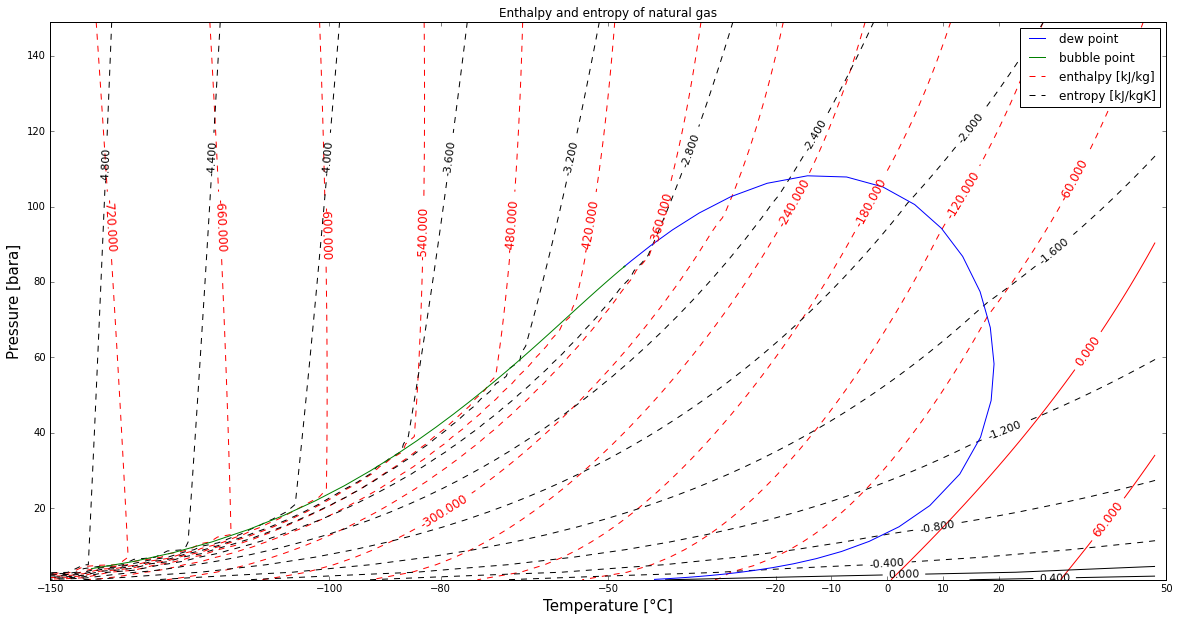

In [19]:
#@title Enthalpy and entropy lines in a phase envelope of natural gas
minPressure = 1.0  #@param {type:"number"}
maxPressure = 150.0  #@param {type:"number"}

minTemperature = -150.0  #@param {type:"number"}
maxTemperature = 50.0  #@param {type:"number"}

nitrogen = 1.0 #@param {type:"number"}
CO2 = 2.5 #@param {type:"number"}
methane = 80.0  #@param {type:"number"}
ethane = 5.0  #@param {type:"number"}
propane =  2.5 #@param {type:"number"}
ibutane =  1.25 #@param {type:"number"}
nbutane =  1.0 #@param {type:"number"}
ipentane =  0.4 #@param {type:"number"}
npentane =  0.3 #@param {type:"number"}
nhexane =  0.08#@param {type:"number"}

fluid1 = fluid('srk')
fluid1.addComponent("nitrogen", nitrogen)
fluid1.addComponent("CO2", CO2)
fluid1.addComponent("methane", methane)
fluid1.addComponent("ethane", ethane)
fluid1.addComponent("propane", propane)
fluid1.addComponent("i-butane", ibutane)
fluid1.addComponent("n-butane", nbutane)
fluid1.addComponent("i-pentane", ipentane)
fluid1.addComponent("n-pentane", nbutane)
fluid1.addComponent("n-hexane", nhexane)
fluid1.setMixingRule(2);

def enthalpy(temperature1,pressure1):
    fluid1.setPressure(pressure1, 'bara')
    fluid1.setTemperature(temperature1, 'C')
    TPflash(fluid1)
    fluid1.initProperties();
    return fluid1.getEnthalpy('J/kg')/1000.0

def entropy(temperature1,pressure1):
    fluid1.setPressure(pressure1, 'bara')
    fluid1.setTemperature(temperature1, 'C')
    TPflash(fluid1)
    fluid1.initProperties();
    return fluid1.getEntropy('J/kgK')/1000.0

temperature = np.arange(minTemperature, maxTemperature, int((maxTemperature-minTemperature)/100)+1)
pressure = np.arange(minPressure, maxPressure, int((maxPressure-minPressure)/100)+1)

X, Y = np.meshgrid(temperature, pressure)
enthalpyGas = np.fromiter(map(enthalpy, X.ravel(), Y.ravel()), X.dtype).reshape(X.shape)
entropyGas = np.fromiter(map(entropy, X.ravel(), Y.ravel()), X.dtype).reshape(X.shape)

thermoOps = neqsim.thermodynamicOperations.ThermodynamicOperations(fluid1)
thermoOps.calcPTphaseEnvelope()
plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots()
CS = ax.contour(temperature,pressure, enthalpyGas, 15 ,colors='r')
CS.collections[0].set_label('enthalpy [kJ/kg]')
CS2 = ax.contour(temperature,pressure, entropyGas, 15 ,colors='k')
CS2.collections[0].set_label('entropy [kJ/kgK]')
ax.clabel(CS, inline=1, fontsize=12)
ax.clabel(CS2, inline=1, fontsize=11)
plt.plot([x - 273.15 for x in list(thermoOps.getOperation().get("dewT"))],list(thermoOps.getOperation().get("dewP")), label="dew point")
plt.plot([x - 273.15 for x in list(thermoOps.getOperation().get("bubT"))],list(thermoOps.getOperation().get("bubP")), label="bubble point")
plt.title('Enthalpy and entropy of natural gas')
plt.xlabel('Temperature [\u00B0C]', fontsize=15)
plt.ylabel('Pressure [bara]', fontsize=15)
plt.legend()
plt.xticks(ticks=[-150.0, -100.0, -80.0,-50.0, -20.0, -10.0, 0.0, 10.0, 20.0, 50.0])
plt.show()